In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91928\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load the data
column_names=['target','id','date','flag','user','text']
data = pd.read_csv(r"Training_data1.csv",names=column_names,encoding='ISO-8859=1')

print(f"Dataset shape : {data.shape}")

Dataset shape : (100000, 6)


In [3]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['target' 'id' 'date' 'flag' 'user' 'text']


In [5]:
#Check for null values

data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (100000, 6)


In [7]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['text'].apply(len)

In [8]:
data.head()

,target,id,date,flag,user,text,length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


In [9]:
#Randomly checking for 10th record

print(f"'text' column value: {data.iloc[10]['text']}") #Original value
print(f"Length of text : {len(data.iloc[10]['text'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'text' column value: spring break in plain city... it's snowing 
Length of text : 43
'length' column value : 43


In [10]:
data.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
length     int64
dtype: object

In [11]:
len(data)

100000

In [12]:
#Coverting the target '4' to '1'

data.replace({'target':{4:1}},inplace=True)

In [13]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['target'].value_counts()}")

Rating value count: 
target
0    50000
1    50000
Name: count, dtype: int64


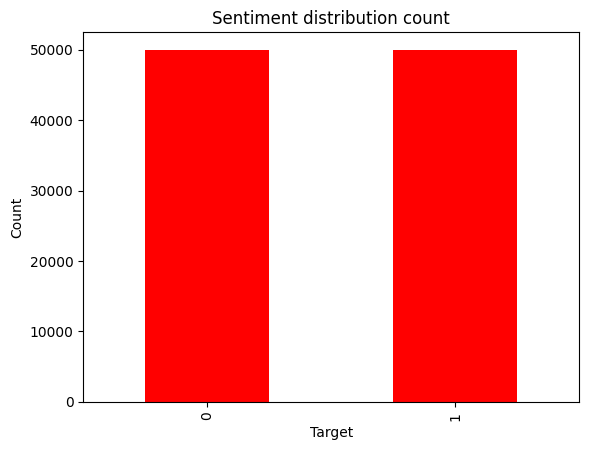

In [14]:
#Bar plot to visualize the total counts of each rating

data['target'].value_counts().plot.bar(color = 'red')
plt.title('Sentiment distribution count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [15]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['target'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
target
0    50.0
1    50.0
Name: count, dtype: float64


In [16]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['target'].value_counts()}")

Feedback value count: 
target
0    50000
1    50000
Name: count, dtype: int64


In [17]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['target'] == 0].iloc[1]['text']
print(review_0)


is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [18]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['target'] == 1].iloc[1]['text']
print(review_1)

just got home from a meeting with the girls... Maaaaaan I'm exhausted!! Goodnight world 


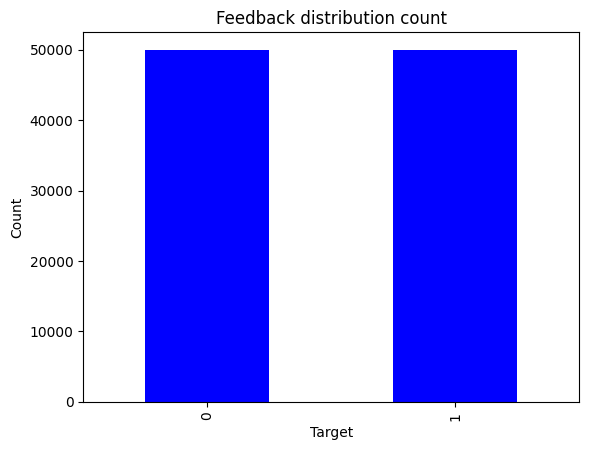

In [19]:
#Bar graph to visualize the total counts of each feedback

data['target'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [20]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['target'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
target
0    50.0
1    50.0
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

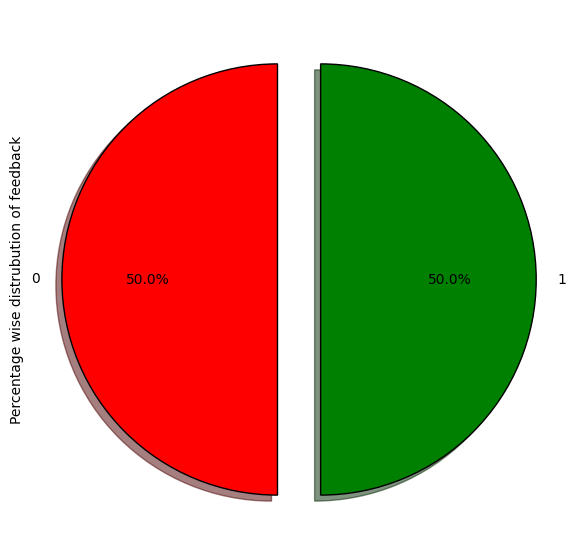

In [21]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['target'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [22]:
#Feedback = 0
data[data['target'] == 0]['text'].value_counts()

text
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D                      95
@alicayaba so cuuute! hey, i miss you na!  its not the same not seeing you girls everyday                                                95
Michigan who?  I don't know them.                   *sigh*   Shameful!                                                                   95
@FranzGlaus I know, just wanted to let everybody know what was happening                                                                 95
My thoughts are with Sandra Cantu's family at this difficult and sad time                                                                95
                                                                                                                                         ..
@CaitlinOConnor i want tacos and margarhitas  telll gay i say hello&lt;33                                                                 1
Borders closed 

In [23]:
#Feedback = 1
data[data['target'] == 1]['text'].value_counts()

text
please ignore cheesey music                                                                                                                     212
@paulcarr I just laughed out loud on the bus reading your statement of ethics. People moved away. He he he.                                     212
@MrWize sike sike call it truce???????????????? u still a bitch and my ppl still gonna air u out tho                                            212
@urbanpinkpixie Susan Egan, I love her! And yeah, it said I would have a pleasant trip.                                                         212
not goin tto tafe                                                                                                                               212
                                                                                                                                               ... 
@xxm0rgann aww morgan, i wish i could have realized that a while ago instead of putting myself through it..

In [24]:
data['length'].describe()

count    100000.000000
mean         75.402310
std          36.327242
min           9.000000
25%          46.000000
50%          72.000000
75%         103.000000
max         150.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of text ')]

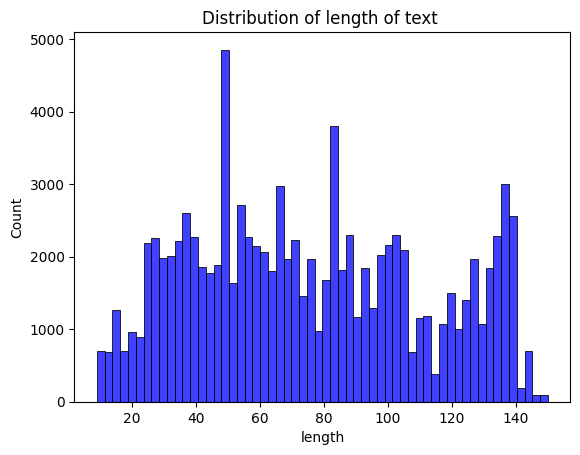

In [25]:
    sns.histplot(data['length'],color='blue').set(title='Distribution of length of text ')


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

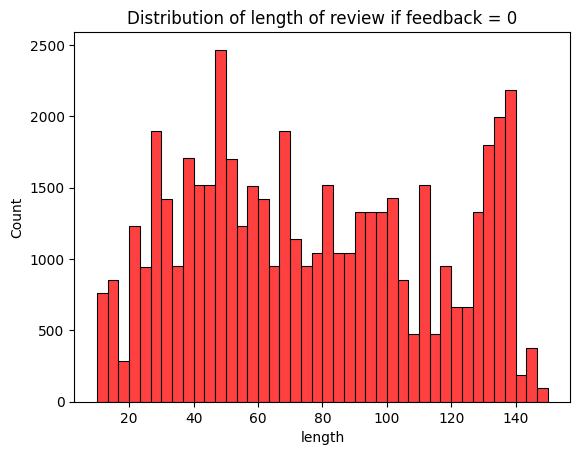

In [26]:
sns.histplot(data[data['target']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

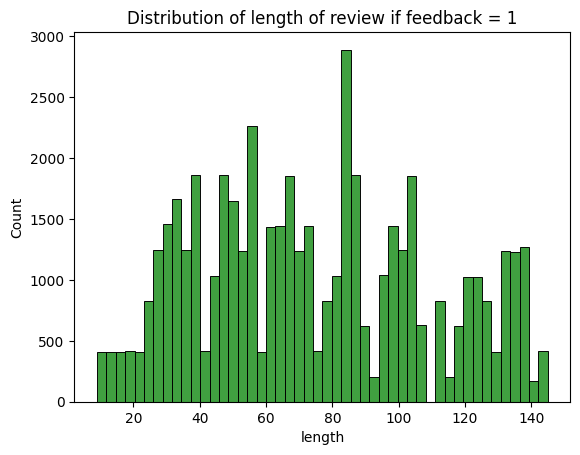

In [27]:
sns.histplot(data[data['target']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

In [28]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.text)

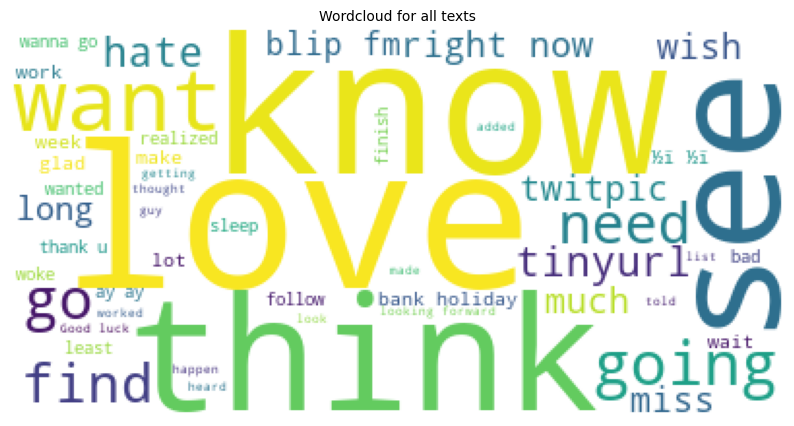

In [29]:
# Combine all reviews
reviews = " ".join([review for review in data['text']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all texts', fontsize=10)
plt.axis('off')
plt.show()

In [30]:
# Combine all reviews for each feedback category and splitting them into individual words
#neg_reviews = " ".join([review for review in data[data['target'] == 0]['text']])
#neg_reviews = neg_reviews.lower().split()

#pos_reviews = " ".join([review for review in data[data['target'] == 1]['text']])
#pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
#unique_negative = [x for x in neg_reviews if x not in pos_reviews]
#unique_negative = " ".join(unique_negative)

#unique_positive = [x for x in pos_reviews if x not in neg_reviews]
#unique_positive = " ".join(unique_positive)

In [31]:
'''wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()'''

"wc = WordCloud(background_color='white', max_words=50)\n\n# Generate and plot wordcloud\nplt.figure(figsize=(10,10))\nplt.imshow(wc.generate(unique_negative))\nplt.title('Wordcloud for negative reviews', fontsize=10)\nplt.axis('off')\nplt.show()"

In [32]:
'''wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()'''

"wc = WordCloud(background_color='white', max_words=50)\n\n# Generate and plot wordcloud\nplt.figure(figsize=(10,10))\nplt.imshow(wc.generate(unique_positive))\nplt.title('Wordcloud for positive reviews', fontsize=10)\nplt.axis('off')\nplt.show()"

In [33]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['text'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [34]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['target'].values

In [35]:
#Saving the Count Vectorizer
import pickle
pickle.dump(cv, open('D:/FINAL YEAR PROJECT/project/Models/countVectorizer.pkl', 'wb'))

In [36]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (100000, 2476)
y shape: (100000,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (70000, 2476)
y train: (70000,)
X test: (30000, 2476)
y test: (30000,)


In [38]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 6
X test max value: 6


In [39]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [40]:
#saving the scaler model
pickle.dump(scaler, open('D:/FINAL YEAR PROJECT/project/Models/scaler.pkl', 'wb'))

In [41]:
#Random Forest
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [42]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [43]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [44]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

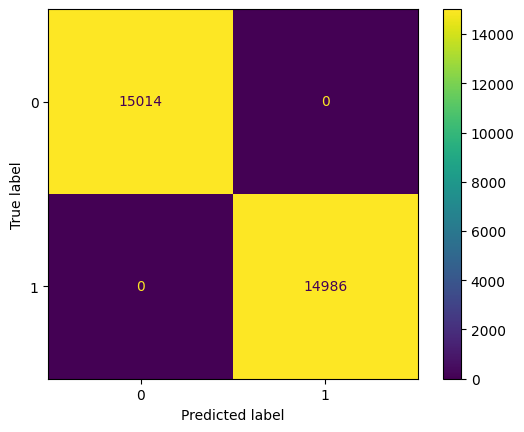

In [45]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [46]:
#K fold
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9999857142857144
Standard Variance : 4.2857142857133376e-05


In [47]:
#XGBoost

model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9978571428571429
Testing Accuracy : 0.9979333333333333


In [49]:
y_preds = model_xgb.predict(X_test)

In [50]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[14309   705]
 [   62 14924]]


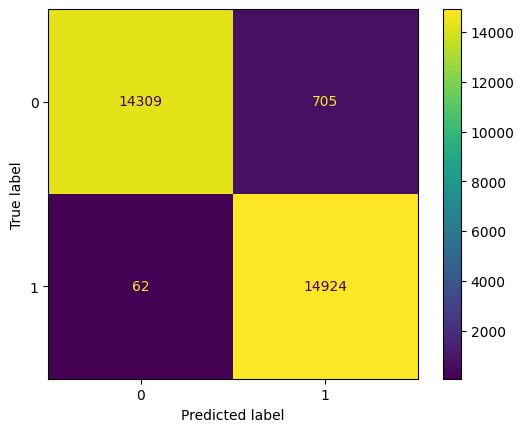

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [52]:
pickle.dump(model_xgb, open('D:/FINAL YEAR PROJECT/project/Models/model_xgb.pkl','wb'))

In [53]:
#Decision Tree Classifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [54]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [55]:
y_preds = model_dt.predict(X_test)

In [56]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[14889   125]
 [    0 14986]]


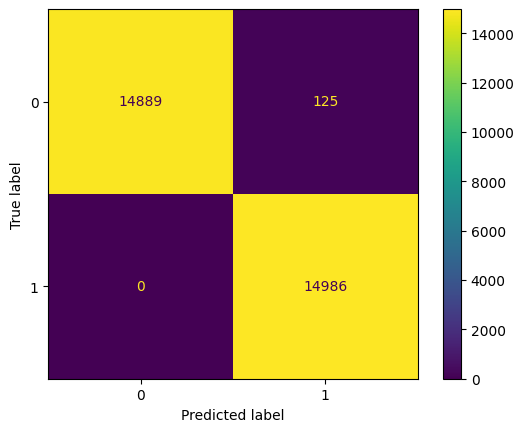

In [57]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()